# Phase 4 Code Challenge Review

Made using resources that Max put together, thanks Max!

## Overview

- Principal Component Analysis
- Clustering
- Time Series
- Natural Language Processing

In [1]:
# Basic Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# from src.call import call_on_students

# 1) Principal Component Analysis

![pca gif saved from learnco](images/pca.gif)

## PCA Concepts

### 1: What does PCA do? 

Specifically, describe what the first principal component represents in relation to the original data.

In [ ]:
# call_on_students(1)

#### Answer: 

- "Works by projecting data from its current n-dimensional subspace into a smaller subspace, while losing as little information as possible in the process." Essentially transforming the data along the principal axes with the idea of capturing the maximum amount of variance with each axis using Linear Algenbra and Eigenvectors.
- First principal component represents the feature capturing the most explained variance in one direction. The second component would capture the variance in points on the axis orthogonal to the first.


### 2: What are some reasons to use PCA?

In [ ]:
# call_on_students(1)

#### Answer: 

- Dimensionality reduction which improves model performance by reducing collinearity between features and reduces computational complexity, taking less memory in your hardware and allowing the models to run faster.


### 3: Why is scaling important for PCA?

In [ ]:
# call_on_students(1)

#### Answer: 

- PCA is focused on capturing features with the most variance. So if we have features on different scales, the PCA is going to be skewed toward the higher magnitude features - which would likely cause the PCA to choose improper components.


### 4: How can one determine how many principle components to use in a model?

In [ ]:
# call_on_students(1)

#### Answer: 

- You want to pick the number of components that captures the majority of the explained variance, which can be done by designating the percentage of variance to capture at PCA instantiation or a specific # of components in the n_components parameter.
- If for a visualization, max is going to be 2 or 3 features. Except for clustering - then your components could be higher.


## PCA in Code

### Set Up

In [73]:
from sklearn.datasets import  load_breast_cancer
import pandas as pd
data = load_breast_cancer()
X = pd.DataFrame(data['data'], columns = data['feature_names'])
X.head()
y = data['target']

### 5: Prepare our Data for PCA

What steps do we need to take to preprocess our data effectively?

- Scale.
- No test train split in this example because? No modeling?


In [ ]:
# call_on_students(1)

In [74]:
# Code to preprocess X
from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X, y)

from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)
# scaler.fit(X_train)
# X_train = scaler.transform(X_train)
# X_test = scaler.transform(X_test)

# pd.DataFrame(X_train, columns=data.feature_names)

### 6: Import PCA, Then Instantiate and Fit a PCA Object

In [ ]:
# call_on_students(1)

In [75]:
# Code to import, instantiate and fit a PCA object
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(X_scaled)
# X_train_pca = pca.transform(X_train)
# X_test_pca = pca.transform(X_test)

PCA()

### 7: How Much Variance is Explained by the First 2 Components?

In [ ]:
# call_on_students(1)

In [77]:
# Code here to answer the question
print(pca.explained_variance_ratio_[:2])
print(sum(pca.explained_variance_ratio_[:2]))

[0.44272026 0.18971182]
0.6324320765155942


#### Answer:

- 44.27% and 18.97%, or 63%


# 2) Clustering

## Clustering Concepts

### 8: Describe how the K-Means algorithm updates its cluster centers after initialization.

In [ ]:
# call_on_students(1)

#### Answer:

- Pick (K) clusters and algorithm will randomly initialize the location of the centroids.
- After initialization, the cluster centroids are recomputed by the arithmetic mean of all the points belonging to the cluster and then all the observations are reassigned to whatever centroid is the closest to it. Reallocation stops if no observations are moved after recalculating.


### 9: What is inertia, and how does K-Means use inertia to determine the best estimator?

Please also describe the method you can use to evaluate clustering using inertia.

Documentation, for reference: https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

In [ ]:
# call_on_students(1)

#### Answer:

- Inertia is the sum of squared distances of the samples to the cluster center. Intra-cluster variance or tightness of the cluster points to the centroid.
- This can be evaulated using an elbow plot that will also show us the optimal value for K.
- K-means minimizes inertia.


### 10: What other metric do we have to score the clusters which are formed?

Describe the difference between it and inertia.

In [ ]:
# call_on_students(1)

#### Answer:

- The Silhouette score & plot is another way to score the clusters - it ranges from -1 to 1 with 1 being perfect. Uses the mean intra-cluster distance and the mean nearest cluster distance for each sample. 
- This score tells us how far the datapoints in one cluster are from datapoints in another cluster whereas inertia only considers the datapoints within it's own cluster.
- Silhouette is maximizing the similarity of the points within the cluster and maximize the distance between the clusters.


## Clustering in Code with Heirarchical Agglomerative Clustering

After the above conceptual review of KMeans, let's practice coding with agglomerative clustering.


### Set Up

In [7]:
# New dataset for this section!
from sklearn.datasets import load_iris

data = load_iris()
X = pd.DataFrame(data['data'])
y = data['target']
X.head()

,0,1,2,3
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


### 11: Prepare our Data for Clustering

What steps do we need to take to preprocess our data effectively?

- Scale... 


In [ ]:
# call_on_students(1)

In [8]:
# Code to preprocess the data
# Name the processed data X_processed

X_processed = scaler.fit_transform(X)
pd.DataFrame(X_processed)

,0,1,2,3
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444
...,...,...,...,...
145,1.038005,-0.131979,0.819596,1.448832
146,0.553333,-1.282963,0.705921,0.922303
147,0.795669,-0.131979,0.819596,1.053935
148,0.432165,0.788808,0.933271,1.448832


### 12: Import the Relevant Class, Then Instantiate and Fit a Hierarchical Agglomerative Clustering Object

Let's use `n_clusters = 2` to start (default)

In [ ]:
# call_on_students(1)

In [9]:
# Import the relevent clustering algorithm
from sklearn.cluster import AgglomerativeClustering
hac = AgglomerativeClustering(n_clusters=2)

In [10]:
# Fit the object
hac.fit(X_processed)
labels = hac.labels_

In [11]:
# Calculate a silhouette score
from sklearn import metrics

metrics.silhouette_score(X_processed,labels)

0.5770346019475988

### 13: Write a Function to Test Different Options for `n_clusters`

The function should take in the number for `n_clusters` and the data to cluster, fit a new clustering model using that parameter to the data, print the silhouette score, then return the labels attribute from the fit clustering model.

In [ ]:
# call_on_students(1)

In [78]:
def test_n_for_clustering(n, data):
    """ 
    Tests different numbers for the hyperparameter n_clusters
    Prints the silhouette score for that clustering model
    Returns the labels that are output from the clustering model

    Parameters: 
    -----------
    n: float object
        number of clusters to use in the agglomerative clustering model
    data: Pandas DataFrame or array-like object
        Data to cluster

    Returns: 
    --------
    labels: array-like object
        Labels attribute from the clustering model
    """
    # Fit the new clustering model
    model = AgglomerativeClustering(n_clusters=n)
    model.fit_predict(data)
    # Print the silhouette score
    score = metrics.silhouette_score(data, model.labels_)
    print("Clusters:", n, "Silhouette Score:", score)
    # Return the labels attribute from the fit clustering model
    return model.labels_


In [79]:
# Testing your function

for n in range(2, 9):
    test_n_for_clustering(n, X_processed)

Clusters: 2 Silhouette Score: 0.5770346019475988
Clusters: 3 Silhouette Score: 0.4466890410285909
Clusters: 4 Silhouette Score: 0.4006363159855973
Clusters: 5 Silhouette Score: 0.33058726295230545
Clusters: 6 Silhouette Score: 0.3148548010051283
Clusters: 7 Silhouette Score: 0.31696983029912795
Clusters: 8 Silhouette Score: 0.31094652900725794


In [80]:
test_n_for_clustering(9, X_processed)

Clusters: 9 Silhouette Score: 0.31143422475471655


array([5, 4, 4, 4, 5, 7, 4, 5, 4, 4, 5, 4, 4, 4, 7, 7, 7, 5, 7, 5, 5, 5,
       5, 5, 4, 4, 5, 5, 5, 4, 4, 5, 7, 7, 4, 4, 5, 5, 4, 5, 5, 2, 4, 5,
       5, 4, 5, 4, 5, 4, 0, 0, 0, 1, 0, 1, 0, 2, 0, 1, 2, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 0, 1, 2, 1, 1, 1, 0, 2, 1, 3, 0, 3, 0, 0, 6, 1, 6, 0, 8,
       3, 0, 3, 0, 0, 3, 0, 8, 6, 1, 3, 0, 6, 0, 3, 6, 0, 0, 0, 6, 6, 8,
       0, 0, 0, 6, 3, 0, 0, 3, 3, 3, 0, 3, 3, 3, 0, 0, 3, 0])

# 3) Time Series

In [28]:
# New dataset for this section!
ap = pd.read_csv('data/AirPassengers.csv')
ap.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


### 14: Prepare our Data for Time Series Analysis

What steps do we need to take to preprocess our data effectively?

- Change month to date time object and set to index. Passengers will be values. Should be pandas series.


In [ ]:
# call_on_students(1)

In [29]:
# Code here 
pd.to_datetime(ap.Month)

airline = pd.Series(data=ap['#Passengers'].values, index=ap['Month'])
#ts = ap.set_index('Month') or ap.index = pd.to_datetime(ap['Month']) | ap = ap.drop(columns = 'Month')

### 15: Explore Patterns in the Data

In [ ]:
# call_on_students(1)

First: what kinds of patterns can one find in time series data?

- Seasonality
- Periods
- Cyclical
- Upward
- Trends -up or down, linear, exponential, periodic
- Stationarity


Second, plot this time series data. What kinds of patterns do you see in this dataset?

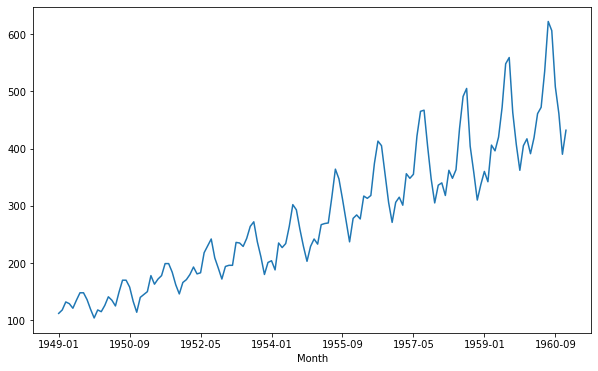

In [83]:
# Code to plot the time series
airline.plot(figsize=(10,6));
#Inferior method - ticks are hard to visualize
# plt.figure(figsize=(16,8)) 
# plt.plot(airline)
# plt.xticks(rotation=90);
#Upward linear trend, exponential growth over the periods, seasonality

### 16: Explore the Moving Average

What window would make sense to use for this data?

- Annual - 12


In [ ]:
# call_on_students(1)

In [84]:
# Code to create the moving average
from statsmodels.tsa.stattools import adfuller

rolling = airline.rolling(window=12).mean()
# rol_std = airline.rolling(window=1).std()

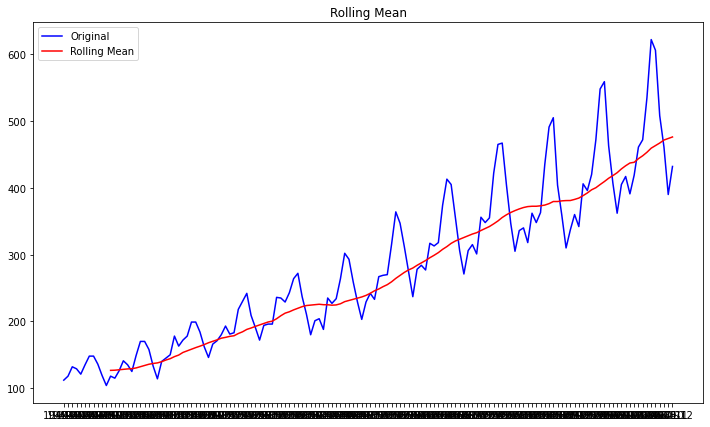

In [89]:
# Add to the moving average to the above plot
fig = plt.figure(figsize=(12, 7))
plt.plot(airline, color='blue', label='Original')
plt.plot(rolling, color='red', label='Rolling Mean')
# std = plt.plot(rol_std, color='black', label='Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean')
plt.show(block=False);

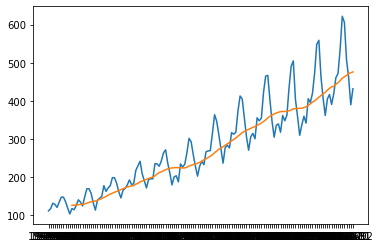

In [92]:
#alternate method
plt.plot(airline)
plt.plot(rolling)

### 17: Explore Stationarity


In [ ]:
# call_on_students(1)

Why do we try to make our data stationary?

- To try and get our time series features to be independent of the others. Leave the noise out of the model.


What can we do to make our data stationary?

- Penalize the higher values more by doing log transformation, square root transformations or cube root transformations. Subtract the rolling mean or standard deviation from the series. Differencing.


### 18: Check Stationarity

In [ ]:
# call_on_students(1)

In [32]:
# Code here to check if the data is stationary
test = adfuller(airline)
print("Results: p-value:", test[1])
print(test)

Results: p-value: 0.991880243437641
(0.815368879206047, 0.991880243437641, 13, 130, {'1%': -3.4816817173418295, '5%': -2.8840418343195267, '10%': -2.578770059171598}, 996.6929308390189)


### 19: Try to Make the Data Stationarity

Implement one strategy to try to make the data more stationary, then check if it worked.

In [ ]:
# call_on_students(1)

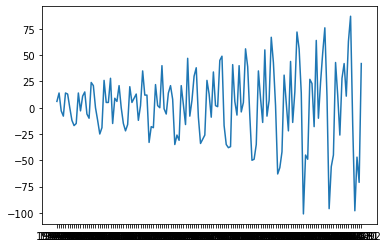

In [33]:
# Code here to try to make the data stationary
diff = airline.diff().dropna()
plt.plot(diff);

In [34]:
# Code here to check if the data is stationary
diff_test = adfuller(diff)
print("Results: p-value:", diff_test[1])
print(diff_test)

Results: p-value: 0.054213290283824704
(-2.8292668241700056, 0.054213290283824704, 12, 130, {'1%': -3.4816817173418295, '5%': -2.8840418343195267, '10%': -2.578770059171598}, 988.5069317854084)


In [ ]:
#P value still exceeds alpha .05 - cannot reject H0. Non-stationary.

<a id='clust'></a>

# 4) Natural Language Processing

## NLP Concepts

### Some Example Text

In [35]:
# Each sentence is a document
sentence_one = "Harry Potter is the best young adult book about wizards"
sentence_two = "Um, EXCUSE ME! Ever heard of Earth Sea?"
sentence_three = "I only like to read non-fiction.  It makes me a better person."

# The corpus is composed of all of the documents
corpus = [sentence_one, sentence_two, sentence_three]

### 20: NLP Pre-processing

List at least three steps you can take to turn raw text like this into something that would be semantically valuable (aka ready to turn into numbers):

In [ ]:
# call_on_students(1)

#### Answer:

1. Lowercase
2. Remove Punctuation
3. Remove Stopwords
4. Lemmatization
5. Tokenize

### 21: Describe what vectorized text would look like as a dataframe.

If you vectorize the above corpus, what would the rows and columns be in the resulting dataframe (aka document term matrix)

In [ ]:
# call_on_students(1)

#### Answer:

- Rows would be the document names/numbers and columns would be the words and the values within the columns would be the counts of the given word for that document.


### 22: What does TF-IDF do?

Also, what does TF-IDF stand for?

In [ ]:
# call_on_students(1)

#### Answer:

- Term Frequency - Inverse Document Frequency: it's used to normalize imbalance with raw word counts. 
- Takes into account the rarity of the words. How often the word shows up in the doc divided by total number of terms in the corpus. This is divided by the IDF, which it log base e (total num docs divided by the number of docs with the term within it).
- Less common words across documents get heavier weights of importance with TF-IDF because they provide more insight or interest with specific document scores. Good default for determining document content.


## NLP in Code

### Set Up

In [106]:
# New section, new data
policies = pd.read_csv('data/2020_policies_feb_24.csv')

def warren_not_warren(label):
    
    '''Make label a binary between Elizabeth Warren
    speeches and speeches from all other candidates'''
    
    if label =='warren':
        return 1
    else:
        return 0
    
policies['candidate'] = policies['candidate'].apply(warren_not_warren)

The dataframe loaded above consists of policies of 2020 Democratic presidential hopefuls. The `policy` column holds text describing the policies themselves.  The `candidate` column indicates whether it was or was not an Elizabeth Warren policy.

In [107]:
policies.head()

,Unnamed: 0,name,policy,candidate
0,0,100% Clean Energy for America,"As published on Medium on September 3rd, 2019:...",1
1,1,A Comprehensive Agenda to Boost America’s Smal...,Small businesses are the heart of our economy....,1
2,2,A Fair and Welcoming Immigration System,"As published on Medium on July 11th, 2019:\nIm...",1
3,3,A Fair Workweek for America’s Part-Time Workers,Working families all across the country are ge...,1
4,4,A Great Public School Education for Every Student,I attended public school growing up in Oklahom...,1


The documents for activity are in the `policy` column, and the target is candidate. 

### 23: Import the Relevant Class, Then Instantiate and Fit a Count Vectorizer Object

In [108]:
# call_on_students(1)

In [109]:
# First! Train-test split the dataset
from sklearn.model_selection import train_test_split

# Code here to train test split
X = policies.policy

y = policies.candidate

X_train, X_test, y_train, y_test = train_test_split(X, y)
X

0      As published on Medium on September 3rd, 2019:...
1      Small businesses are the heart of our economy....
2      As published on Medium on July 11th, 2019:\nIm...
3      Working families all across the country are ge...
4      I attended public school growing up in Oklahom...
                             ...                        
184                  A Commitment to America's Heartland
185                   Dignity and Security in Retirement
186    Small-donor matching system for federal electi...
187            Our Shared Duty: Serving Those Who Served
188    A 21st Century Voting Rights Act to end all ty...
Name: policy, Length: 189, dtype: object

In [110]:
# Import the relevant vectorizer
from sklearn.feature_extraction.text import CountVectorizer

In [111]:
# Instantiate it
cv = CountVectorizer()

In [112]:
# Fit it
X_train_vec = cv.fit_transform(X_train)

### 24: Vectorize Your Text, Then Model

In [113]:
# call_on_students(1)

In [114]:
# Code here to transform train and test sets with the vectorizer
X_train_vec = cv.transform(X_train)
# X_train_vec = pd.DataFrame.sparse.from_spmatrix(X_train_vec)
# X_train_vec.columns = sorted(cv.vocabulary_)
# X_train_vec.set_index(y_train.index, inplace=True)

X_test_vec = cv.transform(X_test)
# X_test_vec = pd.DataFrame.sparse.from_spmatrix(X_test_vec)
# X_test_vec.columns = sorted(cv.vocabulary_)
# X_test_vec.set_index(y_test.index, inplace=True)

In [115]:
X_train_vec.shape

(141, 10843)

In [116]:
# Importing the classifier...
from sklearn.ensemble import RandomForestClassifier

# Code here to instantiate and fit a Random Forest model
rfc = RandomForestClassifier()
rfc.fit(X_train_vec, y_train)

RandomForestClassifier()

In [118]:
# Code here to evaluate your model on the test set
from sklearn.metrics import precision_score
y_hat = rfc.predict(X_test_vec)
precision_score(y_test, y_hat)

0.8888888888888888

In [119]:
rfc.score(X_test_vec, y_test)

0.9166666666666666